In [15]:
from falass import readwrite, job, sld, reflect, compare, analysis

In [16]:
# read in the pdb, lgt, and dat files
# this paritcular simulation had the water at the bottom of the 
#simulation cell so it is necessary to flip the cell
lipid_files = readwrite.Files('example.pdb', lgtfile='example.lgt', datfile='example.dat', flip=True)

In [17]:
# after defining the files above these lines will read them in
lipid_files.read_pdb()
lipid_files.read_lgt()
lipid_files.read_dat()

Reading PDB file 

[ 0 % ]
[# 10 % ]
[## 20 % ]
[### 30 % ]
[#### 40 % ]
[##### 50 % ]
[###### 60 % ]
[####### 70 % ]
[######## 80 % ]
[######### 90 % ]
[########## 100 % ]
Reading LGT file 

[ 0 % ]
[# 10 % ]
[## 20 % ]
[### 30 % ]
[#### 40 % ]
[##### 50 % ]
[###### 60 % ]
[####### 70 % ]
[######## 80 % ]
[######### 90 % ]
[########## 100 % ]
Reading DAT file 

[ 0 % ]
[# 10 % ]
[## 20 % ]
[### 30 % ]
[#### 40 % ]
[##### 50 % ]
[###### 60 % ]
[####### 70 % ]
[######## 80 % ]
[######### 90 % ]
[########## 100 % ]


In [18]:
# these files are then defined within the job, along with the desired 
# layer thickness and cut-off
lipid_job = job.Job(lipid_files, 1., 5.)

In [19]:
# the pdb and lgts files are compared to ensure that the all atom types in the 
# have a scattering length associated
lipid_job.set_lgts()

Setting atoms lengths 

[ 0 % ]
[# 10 % ]
[### 30 % ]
[##### 50 % ]
[###### 60 % ]
[######## 80 % ]
[########## 100 % ]


In [20]:
# the job is then passed to the SLD class from which the SLD is calculated for
# each timestep
lipid_sld = sld.SLD(lipid_job)
lipid_sld.get_sld_profile()
lipid_sld.average_sld_profile()

Calculating SLD profile
[ 0 % ]
[# 10 % ]
[## 20 % ]
[### 30 % ]
[#### 40 % ]
[##### 50 % ]
[###### 60 % ]
[####### 70 % ]
[######## 80 % ]
[######### 90 % ]
[########## 100 % ]
Getting average SLD profile
[ 0 % ]
[# 10 % ]
[## 20 % ]
[### 30 % ]
[#### 40 % ]
[##### 50 % ]
[###### 60 % ]
[####### 70 % ]
[######## 80 % ]
[######### 90 % ]
[########## 100 % ]


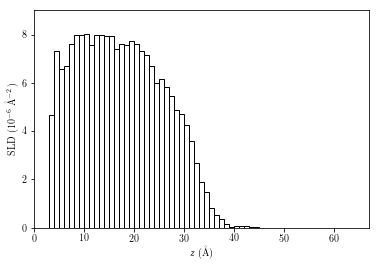

In [21]:
# the SLD profile can be plotted
lipid_sld.plot_sld_profile()

In [22]:
# to get the reflectometry the sld profile is passed to the reflect class
# along with the experimental data (from which the q-vectors are taken)
lipid_reflect = reflect.Reflect(lipid_sld.sld_profile, lipid_files.expdata)

In [23]:
# the reflectometry is calculated for each timesteps and averaged
lipid_reflect.calc_ref()
lipid_reflect.average_ref()

Calculating reflectometry
[ 0 % ]
[# 10 % ]
[### 30 % ]
[##### 50 % ]
[###### 60 % ]
[######## 80 % ]
[########## 100 % ]


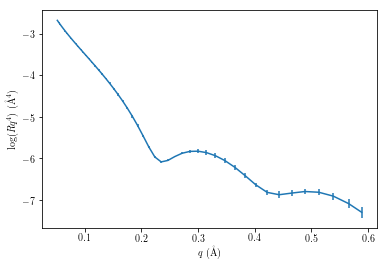

In [24]:
# the calculated reflectivity can then be plotted
lipid_reflect.plot_ref(rq4=False)

In [25]:
# to compare with the experimental data we use the compare class, and define
# starting scale and background values
lipid_compare = compare.Compare(lipid_files.expdata, lipid_reflect.averagereflect, 1e-1, 1e-6)

In [26]:
# the scale and background are fitted and the fitted, calculated reflectometry
# data is returned
lipid_compare.fit()
lipid_compare.return_fitted()

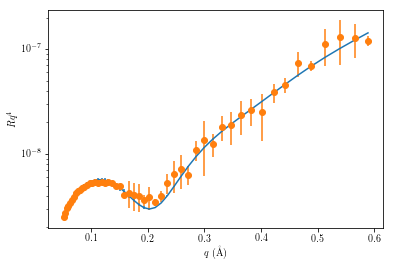

In [27]:
# this can then be plotted
lipid_compare.plot_compare()